In [1]:
#Importação das bibliotecas de dados
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Importação dos dados
dados_ocorrencia = pd.read_csv('FONTE DE DADOS/Ocorrencias.csv', encoding='UTF-8', delimiter=';')
dados_veiculo = pd.read_csv('FONTE DE DADOS/Veiculo.csv', encoding='UTF-8', delimiter=';')

In [3]:
#Retirando o espaço em branco nas colunas
colunas = dados_ocorrencia.columns.tolist()
colunas_sem_espaco = [coluna.strip() for coluna in colunas]
dados_ocorrencia.columns = colunas_sem_espaco
colunas = dados_veiculo.columns.tolist()
colunas_sem_espaco = [coluna.strip() for coluna in colunas]
dados_veiculo.columns = colunas_sem_espaco

In [4]:
#Função para tirar o espaçamento em branco dos dados do tipo string
dados_ocorrencia = dados_ocorrencia.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
dados_veiculo = dados_veiculo.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [5]:
print(dados_ocorrencia.shape)
print(dados_veiculo.shape)

(35088, 14)
(64469, 7)


In [6]:
#União dos dois dataframes Ocorrencia e Veiculo
dados = pd.merge(dados_ocorrencia, dados_veiculo, on='NUMERO_BOLETIM')
print(dados.head())
print(dados.columns)

       NUMERO_BOLETIM DATA_HORA_BOLETIM_x     DATA_INCLUSAO COD_TIPO_ACIDENTE  \
0  2019-000100286-001    01/01/2019 22:30  01/01/2019 22:49            H01002   
1  2019-000100286-001    01/01/2019 22:30  01/01/2019 22:49            H01002   
2  2019-027792628-001    12/06/2019 22:07  12/06/2019 22:43            H01002   
3  2019-027792628-001    12/06/2019 22:07  12/06/2019 22:43            H01002   
4  2019-028025810-001    14/06/2019 07:40  14/06/2019 08:48            H01002   

   COD_TEMPO  COD_PAVIMENTO  COD_REGIONAL  COD_ORIGEM  COORDENADA_X  \
0          1              1             0           1           0.0   
1          1              1             0           1           0.0   
2          1              1             0           1           0.0   
3          1              1             0           1           0.0   
4          1              1             0           1           0.0   

   COORDENADA_Y  COD_VELOCIDADE PERMITIDA  COD_INDICADOR_FATALIDADE  \
0           0.0

In [7]:
#Selecionando as variaveis de entrada e saida
X = dados[['COD_ORIGEM', 'COD_CATEGORIA','COD_TIPO_SOCORRO']]
y = dados[['COD_ESPECIE']]

In [8]:
#Padronização (ou normalização) dos dados em um array
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
# Dividindo os dados em conjuntos de treinamento e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
# Treinando o modelo de árvore de decisão
modelo = DecisionTreeClassifier()
modelo.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier()

In [11]:
# Fazendo as previsões e avaliando a acurácia do modelo
y_pred = modelo.predict(X_teste)
acuracia = accuracy_score(y_teste, y_pred)

print(f'A acurácia do modelo de classificação de arvore de decisão é de {acuracia*100:.2f}%')

A acurácia do modelo de classificação de arvore de decisão é de 78.66%


In [12]:
#Criando a matriz de confusão
conf_mat = confusion_matrix(y_teste, y_pred)

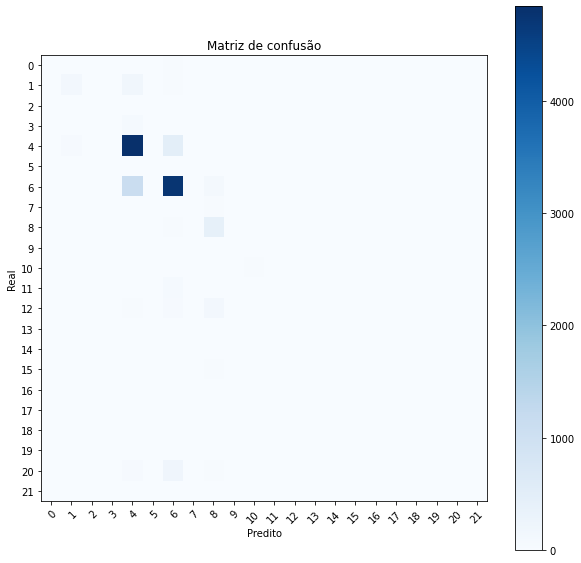

In [13]:
#Fazendo um gráfico par a matriz de confusão
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
ax.set(xticks=np.arange(conf_mat.shape[1]),
       yticks=np.arange(conf_mat.shape[0]),
       xticklabels=np.arange(22),
       yticklabels=np.arange(22),
       title='Matriz de confusão',
       ylabel='Real',
       xlabel='Predito')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

#Adiciona a barra de cores
plt.colorbar(im)

#Exibe o gráfico
plt.show()

In [14]:
#Inserção de dados para teste
#ORIGEM: 0- NI; 1- POLICIA MILITAR; 2- POLICIA CIVIL
#CATEGORIA: 0- NI; 1- OFICIAL; 2- MISSAO DIPLOMATICA; 3- PARTICULAR; 4- ALUGUEL; 5- APRENDIZADO
#TIPO SOCORRO: 0- NI; 1- VEICULO ENVOLVIDO; 2- VIATURA PMMG; 3- AMBULANCIA; 4- TERCEIROS; 5- DISPENSOU ATENDIMENTO; 6- NÃO SE APLICA
novos_dados = pd.DataFrame({'COD_ORIGEM': [1,1,2], 'COD_CATEGORIA': [3,4,3],'COD_TIPO_SOCORRO': [5,6,1]})

In [15]:
#Faz o tratamento de padronização nos novos dados
novos_dados_norm = scaler.transform(novos_dados)

In [16]:
#Gera a previsão e imprime na tela
#ESPECIE: 0-NI; 4- MOTOCICLETA; 6- AUTOMOVEL; 8 - ONIBUS; 12- CAMIONETA; 13- CAMINHAO; 26- CAMINHONETE
previsoes = modelo.predict(novos_dados_norm)
print(previsoes)

[4 8 4]
